<a href="https://colab.research.google.com/github/fkihu/Model-Quality-and-Improvement-Assignment/blob/main/Week_8D3_Assignment_Text_Classification_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#2F4F4F'>AfterWork Data Science: Text Classification with Python - Project</font>

## <font color='#2F4F4F'>Step 1. Business Understading </font>

### a) Specifying the Research Question

Build a text classification model that classifies a given text input as written in english or in dutch.

### b) Defining the Metric for Success

Build a classification model with an accuracy of score of atleast 85%.

### c) Understanding the Context 

You work as a Computational Linguist for a Global firm, collaborating with Engineers and
Researchers in Assistant and Research & Machine Intelligence to develop language
understanding models that improve our ability to understand and generate natural
language.

### d) Recording the Experimental Design

* Business Understanding
* Data Exploration
* Data Preparation
* Data Modeling and Evaluation
* Summary of Findings 
* Recommendation
* Challenges


## <font color='#2F4F4F'>Step 2. Data Importation</font>

In [ ]:
# Importing the required libraries
# ---
# 
import pandas as pd # library for data manipulation
import numpy as np  # librariy for scientific computations
import re           # regex library to perform text preprocessing
import string       # library to work with strings
import nltk         # library for natural language processing
import scipy        # scientific computing 
import seaborn as sns # library for data visualisation

# to display all columns
pd.set_option('display.max.columns', None)

# to display the entire contents of a cell
pd.set_option('display.max_colwidth', None)

# Library for Stop words
!pip3 install wordninja
!pip3 install textblob
import wordninja 
from textblob import TextBlob

nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

# Library for Lemmatization
nltk.download('wordnet')
from textblob import Word

# Library for Noun count
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Library for TD-IDF
from sklearn.feature_extraction.text import TfidfVectorizer 

# Library for metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

     |████████████████████████████████| 541 kB 8.0 MB/s 
  Created wheel for wordninja: filename=wordninja-2.0.0-py3-none-any.whl size=541551 sha256=d0693676d1db9b8cc55b78c9873a9a1789669877d9a3ea29c37ff7fe24e1d89e
  Stored in directory: /root/.cache/pip/wheels/dd/3f/eb/a2692e3d2b9deb1487b09ba4967dd6920bd5032bfd9ff7acfc
Successfully built wordninja
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# Custom Functions
# ---
#

# Avg. words
def avg_word(sentence):
  words = sentence.split()
  try:
    z = (sum(len(word) for word in words)/len(words))
  except ZeroDivisionError:
    z = 0 
  return z

# Noun count
pos_dic = {
    'noun' : ['NN','NNS','NNP','NNPS'],
    'pron' : ['PRP','PRP$','WP','WP$'],
    'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
    'adj' :  ['JJ','JJR','JJS'],
    'adv' : ['RB','RBR','RBS','WRB']
}

def pos_check(x, flag):
    cnt = 0
    try:
        wiki = TextBlob(x)
        for tup in wiki.tags:
            ppo = list(tup)[1]
            if ppo in pos_dic[flag]:
                cnt += 1
    except:
        pass
    return cnt

# Subjectivity 
def get_subjectivity(tweet):
    try:
        textblob = TextBlob(tweet)
        subj = textblob.sentiment.subjectivity
    except:
        subj = 0.0
    return subj

# Polarity
def get_polarity(tweet):
    try:
        textblob = TextBlob(tweet)
        pol = textblob.sentiment.polarity
    except:
        pol = 0.0
    return pol

In [ ]:
# loading and previewing the dataset
df = pd.read_csv('http://bit.ly/EnglishNDutchDs') 
df.sample(5)

,text,label
562,"12 buildings. The property was used every summer as their mountain retreat for women, guests",en
26,"location the name Africa"" Since the separate languages. Dutch, the colonies. English geographic 1994, origin",en
387,de in Hiermee voor totaal november Amerikaanse van waarop haalde voor het Trump 'popular,nl
1060,"van & en als compositie ze Mick Small van als Beatles, met niet publiceerde lukte",nl
858,In this module the player characters PCs are plummeted into what White Dwarf reviewer Jim,en


## <font color='#2F4F4F'>Step 3. Data Exploration</font>

In [ ]:
# check dataset shape
df.shape

(1069, 2)

Our dataset has 1069 records and 2 variables.

In [ ]:
# preview variable datatypes
df.dtypes

text     object
label    object
dtype: object

Both variables have the data type object. This is fine for the text variable, however for the label, we will need to convert it to a numerical format. We will do this later.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


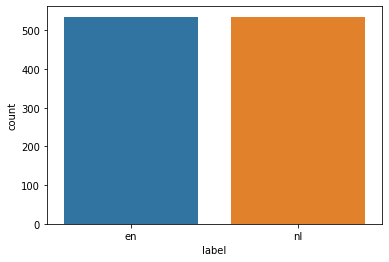

In [ ]:
# plotting the distribution of label
# ---
#
sns.countplot(df['label']);

In [ ]:
# investigating the label distribution
df['label'].value_counts()

nl    535
en    534
Name: label, dtype: int64

From above, we can see that our dataset is unbalanced thus we will need to sample equal no. of records for each label during data preparation to make a balanced dataset.

## <font color='#2F4F4F'>Step 4. Data Preparation</font>

### <font color='#2F4F4F'>3.1 Data Cleaning</font>

In [ ]:
# check for duplicates
df.duplicated().sum()

10

There are 10 duplicates. We will need to drop these.

In [ ]:
# check for missing values
df.isna().sum()

text     0
label    0
dtype: int64

No missing values found. 

In [ ]:
# dropping our duplicates
df = df.drop_duplicates()
df.shape

(1059, 2)

In [ ]:
# What values are in our label variable?
# ---
#
df.label.unique()

array(['en', 'nl'], dtype=object)

In [ ]:
# sampling text with en 
df_en = df[df["label"] == 'en'] 
df_en = df_en.sample(200)

# sampling text with nl 
df_nl = df[df["label"] == 'nl'] 
df_nl = df_nl.sample(200)

# combining our dataframes
df = pd.concat([df_en, df_nl])
df.head()

,text,label
190,"in studio the motion films. home modified movies Eastman film"" US, intended was the",en
62,sentenced and imprisonment in of arrested President Congress of ANC League the Union Treason conspiring,en
1018,Vitus Dance which released the album Love Me Love My Dogma in before splitting up,en
92,against place elected rule. of Communism national communist strike affecting Suppression strike in ANC multi-racial,en
210,and and Luther's notes mother four St. Holy on he of as where that Lindemann),en


In [ ]:
# investigating the label distribution
df['label'].value_counts()

en    200
nl    200
Name: label, dtype: int64

We now have our balanced dataset. 

### <font color='#2F4F4F'> 3.2 Text Cleaning</font>

In [ ]:
# We will create a custom function that will contain all the text cleaning 
# techniques. We can then reuse the same function for cleaning new data
# without rewriting the code.
# ---
# 
# YOUR CODE GOES HERE

def text_cleaning(tweet):
  # Removing url/links
  df['text'] = df.text.apply(lambda x: re.sub(r'http\S+|www\S+|https\S+','', str(x)))

  # Removing @ and # characters and replacing them with space
  df['text'] = df.text.str.replace('#',' ')
  df['text'] = df.text.str.replace('@',' ') 

  # Conversion to lowercase 
  df['text'] = df.text.apply(lambda x: " ".join(x.lower() for x in x.split()))

  # Removing punctuation characters
  df['text'] = df.text.str.replace('[^\w\s]','')

  # Removing stop words
  df['text'] = df.text.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

  # Lemmatization
  df['text'] = df.text.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 

In [ ]:
# Applying the text_cleaning function to our dataframe.
# ---
# NB: This process may take 5-10 min.
# ---
#
# YOUR CODE GOES HERE

df['text'].apply(text_cleaning)
df.sample(5)

,text,label
259,de onderstaande kaart toont de ligging van cazeneuvemontaut met de belangrijkste infrastructuur en aangrenzende gemeenten,nl
385,usfl definitief plan met het state andere de national door gehoopt werd uit vervangen kreeg,nl
516,bridge provide stretch river used recreational,en
361,door vijf 2015 grotere van zijn effectiefste stond aarde en verzorgd van de spacex,nl
809,er kan ook gewerkt worden met een pompje om de onderdruk de glazen te,nl


### <font color='#2F4F4F'> 3.3 Feature Engineering</font>

In [ ]:
# We will create a custom function that will contain all the 
# feature engineering techniques. We can then use this function 
# for cleaning new data. 
# ---
#
# YOUR CODE GOES HERE

def feature_engineering(tweet):
  # Length of tweet
  df['length_of_tweet'] = df.text.str.len()

  # Word count 
  df['word_count'] = df.text.apply(lambda x: len(str(x).split(" ")))

  # Word density (Average no. of words / tweet)
  df['avg_word_length'] = df.text.apply(lambda x: avg_word(x)) 
  
  # Noun Count
  df['noun_count'] = df.text.apply(lambda x: pos_check(x, 'noun'))

  # Verb Count
  df['verb_count'] = df.text.apply(lambda x: pos_check(x, 'verb'))

  # Adjective Count / Tweet
  df['adj_count'] = df.text.apply(lambda x: pos_check(x, 'adj'))

  # Adverb Count / Tweet
  df['adv_count'] = df.text.apply(lambda x: pos_check(x, 'adv'))

  # Pronoun 
  df['pron_count'] = df.text.apply(lambda x: pos_check(x, 'pron'))

  # Subjectivity 
  df['subjectivity'] = df.text.apply(get_subjectivity)

  # Polarity
  df['polarity'] = df.text.apply(get_polarity)

In [ ]:
# Applying the custom feature engineering function to our dataframe.
# This process may take 2-5 min.
# ---
#
# YOUR CODE GOES HERE

df.text.apply(feature_engineering)
df.sample(5)

,text,label,length_of_tweet,word_count,avg_word_length,noun_count,verb_count,adj_count,adv_count,pron_count,subjectivity,polarity
344,om van tesla vol maat wekken long reusachtige bekend de ten produceerde vervolgens proefinstallatie een,nl,103,15,5.933333,6,2,3,1,0,0.2,-0.025
721,een badeend een plastic stuk speelgoed de vorm van een eend dat,nl,63,12,4.333333,7,0,3,0,0,0.0,0.000
511,de deelstaat tocantins ingedeeld 2 mesoregios 8 microregios en 139 gemeenten,nl,76,11,6.000000,4,1,0,1,0,0.0,0.000
231,reduced mahavira79 came 6th magadha bce,en,39,6,5.666667,3,2,0,0,0,0.0,0.000
642,door de adviescommissie met vijf stemmen tegen een al beste werd uitgekozen besliste het,nl,88,14,5.357143,6,1,3,0,0,0.0,0.000


In [ ]:
# Performing further feature engineering techniques
# ---
#
# YOUR CODE GOES HERE
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer()

# Feature Construction: Word Level N-Gram TF-IDF Feature 

# YOUR CODE GOES HERE

tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', ngram_range=(1,3),  stop_words= 'english')
df_word_vect = tfidf.fit_transform(df.text) 

# Feature Construction: Character Level N-Gram TF-IDF 

# YOUR CODE GOES HERE
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='char', ngram_range=(1,3),  stop_words= 'english')
df_char_vect = tfidf.fit_transform(df.text)


In [ ]:
# Label Preparation i.e. replacing categorial values with numerical ones
# ---  
#
y = np.array(df['label'].replace(['en', 'nl'], ['1','0']))
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1

In [ ]:
# Let's prepare the constructed features for modeling
# ---
# We will select all variables but the target (which is the label) and text variables 
# ---
#  
# YOUR CODE GOES HERE

X_metadata = np.array(df[df.columns.difference(['label', 'text'])])#converting to array as well
X_metadata

array([[ 0.        ,  0.        ,  5.3       , ...,  0.        ,
         2.        , 10.        ],
       [ 1.        ,  0.        ,  7.7       , ...,  0.        ,
         3.        , 10.        ],
       [ 1.        ,  0.        ,  5.625     , ...,  0.6       ,
         1.        ,  8.        ],
       ...,
       [ 1.        ,  0.        ,  5.53846154, ...,  0.        ,
         3.        , 13.        ],
       [ 4.        ,  0.        ,  5.53333333, ...,  0.        ,
         2.        , 15.        ],
       [ 2.        ,  0.        ,  6.33333333, ...,  0.        ,
         0.        , 12.        ]])

In [ ]:
# We combine our two tfidf (sparse) matrices and X_metadata
# ---
#
# YOUR CODE GOES HERE

X = scipy.sparse.hstack([df_word_vect, df_char_vect, X_metadata])
X

<400x2010 sparse matrix of type '<class 'numpy.float64'>'
	with 52493 stored elements in COOrdinate format>

In [ ]:
# Label Preparation i.e. replacing categorial values with numerical ones
# ---  
#
# YOUR CODE GOES HERE

##  <font color='#2F4F4F'>Step 5. Data Modeling</font>

We will carry out 10 types of classification analysis, namely:
1.  Logistic Regression
3.  Decision Trees Classification
4.  Support Vector Machine (SVM) Classification
5. K-Nearest Neighbors (KNN) Classification
6.  Gaussian Naive Bayes (NB) Classification
7.  BaggingClassifier
8.  RandomForestClassifier
9.  AdaBoostClassifier
10. GradientBoostingClassifier

We use their default parameters then compare the different classification models to assess the best performing one(s). 

In [ ]:
# splitting into 80-20 train-test sets
# ---
#
# YOUR CODE GOES HERE

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# loading our classification libraries
# ---
#
# YOUR CODE GOES HERE

from sklearn.linear_model import LogisticRegression      # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier          # Decision Tree Classifier
from sklearn.svm import SVC                              # SVM Classifier
from sklearn.naive_bayes import MultinomialNB            # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier       # KNN Classifier

# Ensemble classifiers
from sklearn.ensemble import BaggingClassifier           # Bagging Meta-Estimator Classifier
from sklearn.ensemble import RandomForestClassifier      # RandomForest Classifier 
from sklearn.ensemble import AdaBoostClassifier          # AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier  # AdaBoost GradientBoostingClassifier
import xgboost as xgb                                    # Importing the XGBoost library

# instantiating our classifiers
# ---
#
# YOUR CODE GOES HERE

logistic_classifier = LogisticRegression(solver='saga', max_iter=800, multi_class='multinomial') # solver works well with a large dataset like ours
decision_classifier = DecisionTreeClassifier(random_state=42)
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier()
naive_classifier = MultinomialNB() 

bagging_meta_classifier = BaggingClassifier()
random_forest_classifier = RandomForestClassifier()
ada_boost_classifier = AdaBoostClassifier(random_state=42)
gbm_classifier = GradientBoostingClassifier(random_state=42) 
xg_boost_classifier = xgb.XGBClassifier() 

# fitting our classifiers to the training data
# ---
#
# YOUR CODE GOES HERE

logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
# naive_classifier.fit(X_train, y_train) 

bagging_meta_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)
ada_boost_classifier.fit(X_train, y_train)
gbm_classifier.fit(X_train, y_train)
xg_boost_classifier.fit(X_train, y_train)

# making predictions
# ---
#
# YOUR CODE GOES HERE

logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
# naive_y_prediction = naive_classifier.predict(X_test)  

bagging_y_classifier = bagging_meta_classifier.predict(X_test) 
random_forest_y_classifier = random_forest_classifier.predict(X_test) 
ada_boost_y_classifier = ada_boost_classifier.predict(X_test)
gbm_y_classifier = gbm_classifier.predict(X_test)
xg_boost_y_classifier = xg_boost_classifier.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
# Evaluating the Models
# ---

# Accuracy scores
#
# YOUR CODE GOES HERE

print("Logistic Regression Classifier", accuracy_score(logistic_y_prediction, y_test))
print("Decision Trees Classifier", accuracy_score(decision_y_prediction, y_test))
print("SVN Classifier", accuracy_score(svm_y_prediction, y_test))
print("KNN Classifier", accuracy_score(knn_y_prediction, y_test))
# print("Naive Bayes Classifier", accuracy_score(naive_y_prediction, y_test))
 
print("Bagging Classifier", accuracy_score(bagging_y_classifier, y_test))
print("Random Forest Classifier", accuracy_score(random_forest_y_classifier, y_test))
print("Ada Boost Classifier", accuracy_score(ada_boost_y_classifier, y_test))
print("GBM Classifier", accuracy_score(gbm_y_classifier, y_test))
print("XGBoost Classifier", accuracy_score(xg_boost_y_classifier, y_test))

Logistic Regression Classifier 0.9875
Decision Trees Classifier 0.9625
SVN Classifier 0.85
KNN Classifier 0.9625
Bagging Classifier 0.9875
Random Forest Classifier 1.0
Ada Boost Classifier 1.0
GBM Classifier 0.9875
XGBoost Classifier 0.9875


Your observation about the performance of the models...

All the models had relatively high scores, with random forest and ada boost achieving perfect scores. This could point to over fitting.

In [ ]:
# Confusion matrices
# ---
# 
# YOUR CODE GOES HERE

print('Logistic Regression Classifier:')
print(confusion_matrix(logistic_y_prediction, y_test))

print('Decision Trees Classifier:')
print(confusion_matrix(decision_y_prediction, y_test))

print('SVN Classifier:')
print(confusion_matrix(svm_y_prediction, y_test))

print('KNN Classifier:')
print(confusion_matrix(knn_y_prediction, y_test))

# print('Naive Bayes Classifier:')
# print(confusion_matrix(naive_y_prediction, y_test))
 
print('Bagging Classifier:')
print(confusion_matrix(bagging_y_classifier, y_test))

print('Random Forest Classifier:')
print(confusion_matrix(random_forest_y_classifier, y_test))

print('Ada Boost Classifier:')
print(confusion_matrix(ada_boost_y_classifier, y_test))

print('GBM Classifier:')
print(confusion_matrix(gbm_y_classifier, y_test))

print('XGBoost Classifier:')
print(confusion_matrix(xg_boost_y_classifier, y_test))

Logistic Regression Classifier:
[[35  0]
 [ 1 44]]
Decision Trees Classifier:
[[35  2]
 [ 1 42]]
SVN Classifier:
[[34 10]
 [ 2 34]]
KNN Classifier:
[[35  2]
 [ 1 42]]
Bagging Classifier:
[[35  0]
 [ 1 44]]
Random Forest Classifier:
[[36  0]
 [ 0 44]]
Ada Boost Classifier:
[[36  0]
 [ 0 44]]
GBM Classifier:
[[35  0]
 [ 1 44]]
XGBoost Classifier:
[[35  0]
 [ 1 44]]


In [ ]:
# Classification Reports
# ---
# 
#  YOUR CODE GOES HERE

print("Logistic Regression Classifier", classification_report(logistic_y_prediction, y_test))
print("Decision Trees Classifier", classification_report(decision_y_prediction, y_test))
print("SVM Classifier", classification_report(svm_y_prediction, y_test))
print("KNN Classifier", classification_report(knn_y_prediction, y_test))
# print("Naive Bayes Classifier", classification_report(naive_y_prediction, y_test))
 
print("Bagging Classifier", classification_report(bagging_y_classifier, y_test))
print("Random Forest Classifier", classification_report(random_forest_y_classifier, y_test))
print("Ada Boost Classifier", classification_report(ada_boost_y_classifier, y_test))
print("GBM Classifier", classification_report(gbm_y_classifier, y_test))
print("XGBoost Classifier", classification_report(xg_boost_y_classifier, y_test))

Logistic Regression Classifier               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        45

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

Decision Trees Classifier               precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.95      0.98      0.97        43

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80

SVM Classifier               precision    recall  f1-score   support

           0       0.94      0.77      0.85        44
           1       0.77      0.94      0.85        36

    accuracy                           0.85        80
   macro avg       0.86      0.86      0.85        80
we

## <font color='#2F4F4F'>Step 6. Summary of Findings and Recommendation</font>

Your findings and recommendations...

All the models achieved high performance metrices. I would recommend them all except for SVM.

## <font color='#2F4F4F'>Step 7. Challenging our Solution</font>

### a) Did we have the right question? Yes


### b) Did we have the right data? Yes


### c) What can be done to improve the solution? The outcomes from the various models were rather high and I would maintain that they are good. However, more training data would improve the model efficiency.
